In [1]:
#importing libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [2]:
#importing dataset
df = pd.read_csv('model_data.csv', index_col=0)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3039 entries, 120 to 12809
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   country        3039 non-null   object 
 1   year           3039 non-null   int64  
 2   rgdpe          3039 non-null   float64
 3   rgdpo          3039 non-null   float64
 4   pop            3039 non-null   float64
 5   hc             2539 non-null   float64
 6   csh_i          3039 non-null   float64
 7   csh_g          3039 non-null   float64
 8   rtfpna         2119 non-null   float64
 9   trade          2860 non-null   float64
 10  life_expt      2850 non-null   float64
 11  inflation      2798 non-null   float64
 12  exchange_rate  2663 non-null   float64
 13  military_expt  2622 non-null   float64
 14  score          1151 non-null   float64
 15  polity2        1854 non-null   float64
 16  Status         3039 non-null   float64
 17  gdp_per        3039 non-null   float64
 18  share

### model;
#### status = (hc,gdp_per,life_expt) + csh_i + csh_g + rtfpna + inflation  + exchange_rate + (share_of_gdp,share_of_pop) + year + [military_expt]

In [4]:
#selecting required columsn for the model
df_model = df[['hc', 'csh_i', 'csh_g','rtfpna','inflation','exchange_rate','share_of_gdp','year','Status']]

In [5]:
df_model.dropna(inplace=True)

/Users/aydin/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [6]:
df_model.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1683 entries, 120 to 12739
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   hc             1683 non-null   float64
 1   csh_i          1683 non-null   float64
 2   csh_g          1683 non-null   float64
 3   rtfpna         1683 non-null   float64
 4   inflation      1683 non-null   float64
 5   exchange_rate  1683 non-null   float64
 6   share_of_gdp   1683 non-null   float64
 7   year           1683 non-null   int64  
 8   Status         1683 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 131.5 KB


In [7]:
#defining independent variables
X = df_model.drop('Status',1)

In [8]:
#defining dependent variables
y = df_model['Status']

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20, random_state=42)

In [11]:
#importing svc model
from sklearn.svm import SVC

In [12]:
model = SVC()

In [13]:
#training the model
model.fit(X_train,y_train)

SVC()

In [14]:
model_svm = model

In [15]:
#predictions based on model
predictions = model.predict(X_test)

In [16]:
from sklearn.metrics import classification_report,confusion_matrix, f1_score, accuracy_score

In [17]:
#results
confusion_matrix(y_test,predictions)

array([[  0,   5,  44],
       [  0,  11,  98],
       [  0,   2, 177]])

In [18]:
#results
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00        49
         2.0       0.61      0.10      0.17       109
         3.0       0.55      0.99      0.71       179

    accuracy                           0.56       337
   macro avg       0.39      0.36      0.29       337
weighted avg       0.49      0.56      0.43       337



/Users/aydin/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/aydin/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/aydin/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [19]:
from sklearn.ensemble import RandomForestClassifier

In [20]:
model = RandomForestClassifier(n_estimators=600)

In [21]:
#traing the model
model.fit(X_train,y_train)

RandomForestClassifier(n_estimators=600)

In [22]:
model_rf = model

In [23]:
#predictions based on model
predictions = model.predict(X_test)

In [24]:
#results
confusion_matrix(y_test,predictions)

array([[ 44,   2,   3],
       [  4,  98,   7],
       [  4,   5, 170]])

In [25]:
#results
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

         1.0       0.85      0.90      0.87        49
         2.0       0.93      0.90      0.92       109
         3.0       0.94      0.95      0.95       179

    accuracy                           0.93       337
   macro avg       0.91      0.92      0.91       337
weighted avg       0.93      0.93      0.93       337



In [26]:
from sklearn.linear_model import LogisticRegression

In [27]:
model = LogisticRegression()

In [28]:
#traing the model
model.fit(X_train,y_train)

/Users/aydin/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [29]:
model_lr = model

In [30]:
#predictions based on model
predictions = model.predict(X_test)

In [31]:
#results
confusion_matrix(y_test,predictions)

array([[  3,  34,  12],
       [  3,  64,  42],
       [  1,  22, 156]])

In [32]:
#results
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

         1.0       0.43      0.06      0.11        49
         2.0       0.53      0.59      0.56       109
         3.0       0.74      0.87      0.80       179

    accuracy                           0.66       337
   macro avg       0.57      0.51      0.49       337
weighted avg       0.63      0.66      0.62       337



In [33]:
#improting models
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
import time

In [34]:
def classification_f1_time(df, target, decisiontree = True, randromforest=True, logit=True, kmean=(True,40), xgb=True, svc=True):
    """
    it takes dataframe and return their results with running time
    """
    df_c =df.copy()
    X_train, X_test, y_train, y_test = train_test_split( df_c.drop(target,1),df_c[target], test_size=0.20 ,random_state=42)
    scaler = StandardScaler()
    scaler.fit(X_train)
    X_train_s = scaler.transform(X_train)
    X_test_s = scaler.transform(X_test)
    x=[]
    y=[]
    t=[]
    
    if decisiontree:
        now = time.time()
        tree = DecisionTreeClassifier()
        tree.fit(X_train, y_train)
        y_pred = tree.predict(X_test)
        now1 = time.time()
        t.append(now1-now)
        tree_f = f1_score(y_test,y_pred, average='weighted')
        #print('DecisionTree')
        x.append(tree_f)
        y.append('DecisionTree')
        
    if randromforest:
        now = time.time()
        rand = RandomForestClassifier()
        rand.fit(X_train, y_train)
        y_pred = rand.predict(X_test)
        now1 = time.time()
        t.append(now1-now)
        rand_f = f1_score(y_test,y_pred, average='weighted')
        #print('RandomForestClassifier')
        x.append(rand_f)
        y.append('RandomForestClassifier')
        
    if logit:
        now = time.time()
        log = LogisticRegression()
        log.fit(X_train_s, y_train)
        y_pred = log.predict(X_test_s)
        now1 = time.time()
        t.append(now1-now)
        log_f = f1_score(y_test,y_pred, average='weighted')
        #print('logit')
        x.append(log_f)
        y.append('LogisticRegression')
        
    if xgb:
        now = time.time()
        xf = XGBClassifier()
        xf.fit(X_train, y_train)
        y_pred = xf.predict(X_test)
        now1 = time.time()
        t.append(now1-now)
        xf_f = f1_score(y_test,y_pred, average='weighted')
        #print('xgb')
        x.append(xf_f)
        y.append('XGBClassifier')
        
    if kmean[0]:
        now = time.time()
        acc = []
        for i in range(1, kmean[1]):
            neigh = KNeighborsClassifier(n_neighbors = i).fit(X_train_s,y_train)
            yhat = neigh.predict(X_test_s)
            acc.append(accuracy_score(y_test, yhat))
        n = acc.index(max(acc)) + 1
        neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train_s,y_train)
        y_pred = neigh.predict(X_test_s)
        now1 = time.time()
        t.append(now1-now)
        km_f = f1_score(y_test,y_pred, average='weighted')
        #print('kmeans')
        x.append(km_f)
        y.append('KNeighborsClassifier')
    
    if svc:
        now = time.time()
        sv = SVC()
        sv.fit(X_train_s, y_train)
        y_pred = sv.predict(X_test_s)
        now1 = time.time()
        t.append(now1-now)
        sv_f = f1_score(y_test,y_pred, average='weighted')
        #print('svc')
        x.append(sv_f)
        y.append('SVC')
        

    return pd.DataFrame(zip(y,x,t))

In [35]:
classification_f1_time(df_model,'Status')

,0,1,2
0,DecisionTree,0.850266,0.015136
1,RandomForestClassifier,0.940730,0.349666
2,LogisticRegression,0.589913,0.011789
3,XGBClassifier,0.853809,0.515148
4,KNeighborsClassifier,0.928988,1.019248
5,SVC,0.674252,0.107785


<AxesSubplot:xlabel='1', ylabel='0'>

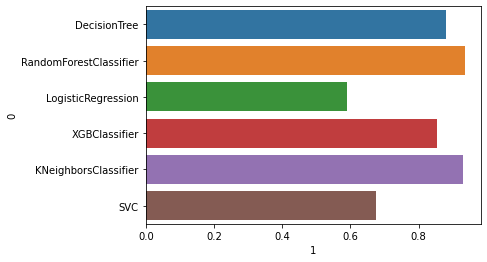

In [36]:
df_temp = classification_f1_time(df_model,'Status')
sns.barplot(df_temp[1], df_temp[0],)

In [37]:
#defining model dataframe
df_model = df[['hc', 'csh_i', 'csh_g','rtfpna','inflation','exchange_rate','share_of_gdp','year','Status','country']].dropna()

In [38]:
df_model.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1683 entries, 120 to 12739
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   hc             1683 non-null   float64
 1   csh_i          1683 non-null   float64
 2   csh_g          1683 non-null   float64
 3   rtfpna         1683 non-null   float64
 4   inflation      1683 non-null   float64
 5   exchange_rate  1683 non-null   float64
 6   share_of_gdp   1683 non-null   float64
 7   year           1683 non-null   int64  
 8   Status         1683 non-null   float64
 9   country        1683 non-null   object 
dtypes: float64(8), int64(1), object(1)
memory usage: 144.6+ KB


In [39]:
#taking log of exchange rate columsn
df_model[['exchange_rate']] = np.log(df_model[['exchange_rate']])

In [40]:
df_model.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1683 entries, 120 to 12739
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   hc             1683 non-null   float64
 1   csh_i          1683 non-null   float64
 2   csh_g          1683 non-null   float64
 3   rtfpna         1683 non-null   float64
 4   inflation      1683 non-null   float64
 5   exchange_rate  1683 non-null   float64
 6   share_of_gdp   1683 non-null   float64
 7   year           1683 non-null   int64  
 8   Status         1683 non-null   float64
 9   country        1683 non-null   object 
dtypes: float64(8), int64(1), object(1)
memory usage: 144.6+ KB


In [41]:
#results with country dummy dataframe
classification_f1_time(pd.get_dummies(df_model),'Status')

,0,1,2
0,DecisionTree,0.926145,0.020227
1,RandomForestClassifier,0.955492,0.348369
2,LogisticRegression,0.919881,0.095650
3,XGBClassifier,0.898318,3.108958
4,KNeighborsClassifier,0.967555,1.384351
5,SVC,0.920853,0.796290


<AxesSubplot:xlabel='1', ylabel='0'>

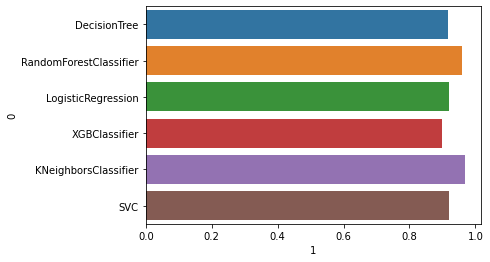

In [42]:
df_temp = classification_f1_time(pd.get_dummies(df_model),'Status')
sns.barplot(df_temp[1], df_temp[0],)

In [43]:
#defining model dataframe
df_model = df[['hc', 'csh_i', 'csh_g','rtfpna','inflation','share_of_gdp','year','Status','country']].dropna()

In [44]:
df_model.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2007 entries, 120 to 12808
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   hc            2007 non-null   float64
 1   csh_i         2007 non-null   float64
 2   csh_g         2007 non-null   float64
 3   rtfpna        2007 non-null   float64
 4   inflation     2007 non-null   float64
 5   share_of_gdp  2007 non-null   float64
 6   year          2007 non-null   int64  
 7   Status        2007 non-null   float64
 8   country       2007 non-null   object 
dtypes: float64(7), int64(1), object(1)
memory usage: 156.8+ KB


In [45]:
#results with country dummy dataframe
classification_f1_time(pd.get_dummies(df_model),'Status')

/Users/aydin/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


,0,1,2
0,DecisionTree,0.912454,0.033217
1,RandomForestClassifier,0.967611,1.180032
2,LogisticRegression,0.960328,0.189163
3,XGBClassifier,0.911018,3.811899
4,KNeighborsClassifier,0.967784,1.162125
5,SVC,0.950606,0.171972


/Users/aydin/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


<AxesSubplot:xlabel='1', ylabel='0'>

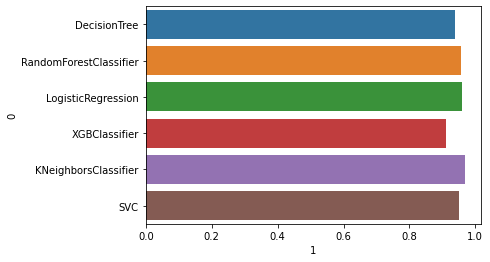

In [46]:

df_temp = classification_f1_time(pd.get_dummies(df_model),'Status')
sns.barplot(df_temp[1], df_temp[0],)

In [47]:
#defining model dataframe
df_model = df[['gdp_per', 'csh_i', 'csh_g','inflation','share_of_gdp','year','Status','country']].dropna()

In [48]:
df_model.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2798 entries, 120 to 12808
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   gdp_per       2798 non-null   float64
 1   csh_i         2798 non-null   float64
 2   csh_g         2798 non-null   float64
 3   inflation     2798 non-null   float64
 4   share_of_gdp  2798 non-null   float64
 5   year          2798 non-null   int64  
 6   Status        2798 non-null   float64
 7   country       2798 non-null   object 
dtypes: float64(6), int64(1), object(1)
memory usage: 196.7+ KB


In [49]:
#results with country dummy dataframe
classification_f1_time(pd.get_dummies(df_model),'Status')

/Users/aydin/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


,0,1,2
0,DecisionTree,0.917988,0.040506
1,RandomForestClassifier,0.960816,0.523570
2,LogisticRegression,0.925160,0.209386
3,XGBClassifier,0.891599,7.343972
4,KNeighborsClassifier,0.958864,2.695197
5,SVC,0.932035,0.368403


In [50]:
#defining model dataframe
df_model = df[['gdp_per', 'csh_i','military_expt', 'csh_g','inflation','share_of_gdp','year','Status','country']].dropna()

In [51]:
#results with country dummy dataframe
classification_f1_time(pd.get_dummies(df_model),'Status')

/Users/aydin/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


,0,1,2
0,DecisionTree,0.916979,0.036390
1,RandomForestClassifier,0.953442,0.452455
2,LogisticRegression,0.915841,0.176003
3,XGBClassifier,0.890805,5.164361
4,KNeighborsClassifier,0.961836,2.799367
5,SVC,0.905640,0.270035


<AxesSubplot:>

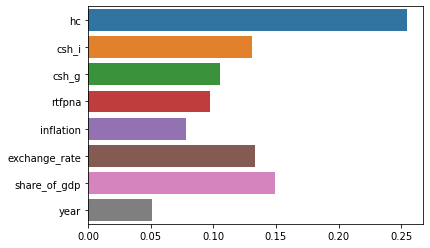

In [54]:
#finding which variable has the most effect
sns.barplot(model_rf.feature_importances_, X_train.columns)

<AxesSubplot:xlabel='1', ylabel='0'>

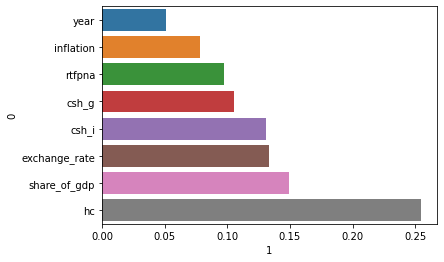

In [56]:
df_temm = pd.DataFrame(zip(X_train.columns, model_rf.feature_importances_))
sns.barplot(x = 1, y = 0, data= df_temm.sort_values(by = 1))